<a href="https://colab.research.google.com/github/natalie-rgb/teamTOM/blob/master/UNET_PROJECT_TEAM9_TOM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Getting data from github repository

In [ ]:
! curl -s https://packagecloud.io/install/repositories/github/git-lfs/script.deb.sh | sudo bash
! sudo apt-get install git-lfs
! git lfs install
! git clone https://github.com/neheller/kits19.git

Detected operating system as Ubuntu/bionic.
Checking for curl...
Detected curl...
Checking for gpg...
Detected gpg...
Running apt-get update... done.
Installing apt-transport-https... done.
Installing /etc/apt/sources.list.d/github_git-lfs.list...done.
Importing packagecloud gpg key... done.
Running apt-get update... done.

The repository is setup! You can now install packages.
Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following package was automatically installed and is no longer required:
  libnvidia-common-440
Use 'sudo apt autoremove' to remove it.
The following NEW packages will be installed:
  git-lfs
0 upgraded, 1 newly installed, 0 to remove and 51 not upgraded.
Need to get 6,877 kB of archives.
After this operation, 16.4 MB of additional disk space will be used.
Get:1 https://packagecloud.io/github/git-lfs/ubuntu bionic/main amd64 git-lfs amd64 2.11.0 [6,877 kB]
Fetched 6,877 kB in 1s (8,576 kB/s)
debconf: unable to ini

In [ ]:
%cd kits19
!pip3 install -r /content/kits19/requirements.txt
! python -m starter_code.get_imaging

/content/kits19
300 cases to download...
Download 1/300: 
case_00000: 100% 225959/225960 [00:15<00:00, 14723.53KB/s]
Download 2/300: 
case_00001: 100% 276387/276388 [00:18<00:00, 14916.42KB/s]
Download 3/300: 
case_00002: 100% 101967/101968 [00:06<00:00, 15721.72KB/s]
Download 4/300: 
case_00003: 100% 118681/118682 [00:08<00:00, 13637.96KB/s]
Download 5/300: 
case_00004: 100% 25269/25270 [00:02<00:00, 10099.19KB/s]
Download 6/300: 
case_00005: 100% 313477/313478 [00:17<00:00, 17601.32KB/s]
Download 7/300: 
case_00006: 100% 78010/78011 [00:05<00:00, 13367.55KB/s]
Download 8/300: 
case_00007: 100% 25826/25827 [00:02<00:00, 10343.90KB/s]
Download 9/300: 
case_00008: 100% 107068/107069 [00:07<00:00, 14323.06KB/s]
Download 10/300: 
case_00009: 100% 34134/34135 [00:03<00:00, 10753.81KB/s]
Download 11/300: 
case_00010: 100% 23541/23542 [00:02<00:00, 9979.80KB/s]
Download 12/300: 
case_00011: 100% 41268/41269 [00:03<00:00, 11436.23KB/s]
Download 13/300: 
case_00012: 100% 43185/43186 [00:03<00:

In [145]:
%cd /content/kits19/

/content/kits19


In [146]:
!pip install medicaltorch

## Visualizing data

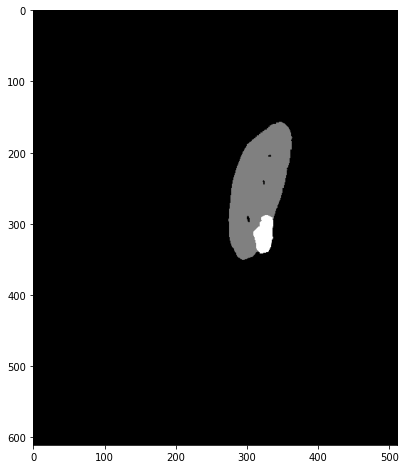

In [147]:
import matplotlib.pyplot as plt
import os
train_path1 = "/content/kits19/data/case_00000"
cases1 =  next(os.walk(train_path1))
input_filename = os.path.join(train_path1, cases1[2][-1])
gt_filename = os.path.join(train_path1, cases1[2][0])

 

plt.figure(figsize=(8,8))
from medicaltorch import datasets as mt_datasets
from skimage import color
pair = mt_datasets.SegmentationPair2D(input_filename, gt_filename) 
slice_pair = pair.get_pair_slice(175)
input_slice = slice_pair["input"]
gt_slice = slice_pair["gt"]

img = input_slice
label = gt_slice
plt.imshow(img, cmap = 'gray')
plt.show()

In [ ]:
# import numpy as np
# np.unique(label)  #ile wyróżnia nam klas

## Loading Libraries for performing segmentation using Deep Learning Techniques

In [148]:
import torch
import os
import cv2
import matplotlib.pyplot as plt
import numpy as np
import nibabel as nib
import torchvision
import torch.nn as nn
import torch.optim as optim
from torch.optim import lr_scheduler, Adam, SGD
from torch.utils.data import Dataset, DataLoader
from medicaltorch import datasets as mt_datasets
from torch.autograd import Variable
import torchvision
from torchvision import datasets, models, transforms
from medicaltorch import models as mt_models
from keras.utils import to_categorical as cat
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
device

device(type='cuda')

## Reading the data paths for processing and getting cases numbers in file_name variable

In [149]:
import os
train_path = "/content/kits19/data/"
cases =  next(os.walk(train_path))
file_name = cases[1]

## Splitting the data into training and validation

In [150]:
train_data = file_name[:240]
validation_data = file_name[240:]

## Getting the model from pre build library

In [151]:
model = mt_models.Unet(drop_rate=0.4, bn_momentum=0.1)

In [ ]:
model

Unet(
  (conv1): DownConv(
    (conv1): Conv2d(1, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (conv1_bn): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (conv1_drop): Dropout2d(p=0.4, inplace=False)
    (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (conv2_bn): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (conv2_drop): Dropout2d(p=0.4, inplace=False)
  )
  (mp1): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv2): DownConv(
    (conv1): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (conv1_bn): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (conv1_drop): Dropout2d(p=0.4, inplace=False)
    (conv2): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (conv2_bn): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (conv2

In [152]:
def transform(img, lbl):
  
  img = img.astype(np.float32)
  lbl = lbl.astype(np.float32)
  img -= np.mean(img)
  img /= 255.0
 
    
  return img, lbl

## Declaring classes to make their dataloaders

In [153]:

class TrainDataset(Dataset):
    def __init__(self, df):
        self.df = df
        # self.transform = transform   
        
    def __len__(self):
        return len(self.df)

    def __getitem__(self, idx):
        global img
        global lbl
        cases = train_data[idx]
        file_path = train_path + cases +'/'
        # print(file_path)
        content = next(os.walk(file_path))
        if 'segmentation.nii.gz' not in content[2]:
          pass
        else:
          input_filename = file_path + content[2][-1]
          gt_filename = file_path + content[2][0]
          pair = mt_datasets.SegmentationPair2D(input_filename, gt_filename)
          slice_pair = pair.get_pair_slice(175)
          img = slice_pair["input"]
          label = slice_pair["gt"]
          img, lbl = transform(img, label)
          img = np.resize(img, (224, 224))  
          img = torch.from_numpy(img).unsqueeze_(0)
          # print('Img shape:', img.shape)
          lbl = np.resize(lbl, (224, 224))  
          lbl = torch.from_numpy(lbl).unsqueeze_(0)
          # print('Img shape:', img.shape)
        return img, lbl 


In [154]:

class ValidDataset(Dataset):
    def __init__(self, df):
        self.df = df
        # self.transform = transform
        
        
    def __len__(self):
        return len(self.df)

    def __getitem__(self, idx):
        global img
        global lbl
        cases = validation_data[idx]
        file_path = train_path + cases +'/'
        content = next(os.walk(file_path))
        if 'segmentation.nii.gz' not in content[2]:
          pass
        else:
          input_filename = file_path + content[2][-1]
          gt_filename = file_path + content[2][0]
          pair = mt_datasets.SegmentationPair2D(input_filename, gt_filename)
          slice_pair = pair.get_pair_slice(175)
          img = slice_pair["input"]
          label = slice_pair["gt"]
          img, lbl = transform(img, label)
          img = np.resize(img, (224, 224))  
          img = torch.from_numpy(img).unsqueeze_(0)
          
          lbl = np.resize(lbl, (224, 224))  
          lbl = torch.from_numpy(lbl).unsqueeze_(0)
          # print('Img shape:', img.shape)
        return img, lbl 
  

## From the dataloaders for further processing of data - data and label images both

In [155]:
train_dataset = TrainDataset(train_data) 
train_loader = DataLoader(train_dataset, batch_size=10, num_workers=0)

valid_dataset = ValidDataset(validation_data) 
valid_loader = DataLoader(valid_dataset, batch_size=10, num_workers=0)

## Loss function and changing optimizers 

In [156]:
criterion = nn.BCEWithLogitsLoss()
optimizer = optim.Adam(model.parameters(), lr=0.01)

## Dice Loss Class

In [157]:
import torch
from torch.autograd import Function


class DiceCoeff(Function):
    

    def forward(self, input, target):
        self.save_for_backward(input, target)
        eps = 0.0001
        self.inter = torch.dot(input.view(-1), target.view(-1))
        self.union = torch.sum(input) + torch.sum(target) + eps

        t = (2 * self.inter.float() + eps) / self.union.float()
        return t

    # This function has only a single output, so it gets only one gradient
    def backward(self, grad_output):

        input, target = self.saved_variables
        grad_input = grad_target = None

        if self.needs_input_grad[0]:
            grad_input = grad_output * 2 * (target * self.union - self.inter) \
                         / (self.union * self.union)
        if self.needs_input_grad[1]:
            grad_target = None

        return grad_input, grad_target


def dice_coeff(input, target):
    """Dice coeff for batches"""
    if input.is_cuda:
        s = torch.FloatTensor(1).cuda().zero_()
    else:
        s = torch.FloatTensor(1).zero_()

    for i, c in enumerate(zip(input, target)):
        s = s + DiceCoeff().forward(c[0], c[1])

    return s / (i + 1)

In [167]:
import pandas as pd

#Starting training

In [ ]:

num_epochs = 15
model.to(device)
history = []

for epoch in range(num_epochs): 
    train_loss_total = 0.0 
    valid_loss_total = 0.0 
    tot = 0
    tot_train = 0
    print('Epoch has started') 
      
    for images, labels in iter(train_loader):
      data = images.to(torch.float)
      data = images.to(device)
      label = labels.to(torch.float)
      label = labels.to(device) 
      # print('step 1 check')
      outputs = model(data)
      # print('blablabla')
      loss = criterion(outputs, label) 
      loss.backward() 
      # print('step 2 check')
      optimizer.step() 
      pred = (outputs > 0.5).float()
      tot_train += dice_coeff(pred, label).item()
      train_loss_total  += loss.item()

    for data, label in iter(valid_loader): 
      
      data = data.to(torch.float)
      data = data.to(device)
      label = label.to(torch.float)
      label = label.to(device) 
      outputs = model(data)
      loss = criterion(outputs, label)
      pred = (outputs > 0.5).float()
      tot += dice_coeff(pred, label).item()
      valid_loss_total  += loss.item()
 
    train_loss_total_avg = train_loss_total / len(train_loader)
    valid_loss_total_avg = valid_loss_total / len(valid_loader)
    dice_train = tot_train/len(train_loader)
    dice_valid = tot/len(valid_loader)

    history.append([train_loss_total_avg, valid_loss_total_avg, dice_train, dice_valid]) 
    print('epoch number ', epoch, "		",'Training loss value', train_loss_total_avg , "		", 'Validation Loss Value', valid_loss_total_avg  \
          , "		", 'Dice Loss for train is', dice_train, "  ", 'Dice loss for validation is', dice_valid)
    
history = pd.DataFrame(history, columns=['train_loss', 'valid_loss', 'train_dice_loss', 'valid_dice_loss'])  

Epoch has started


/usr/local/lib/python3.6/dist-packages/torch/nn/functional.py:2973: UserWarning: Default upsampling behavior when mode=bilinear is changed to align_corners=False since 0.4.0. Please specify align_corners=True if the old behavior is desired. See the documentation of nn.Upsample for details.
  "See the documentation of nn.Upsample for details.".format(mode))
/usr/local/lib/python3.6/dist-packages/torch/nn/functional.py:1569: UserWarning: nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.
  warnings.warn("nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.")


epoch number  0 		 Training loss value 97.42293039957683 		 Validation Loss Value 35.82359663645426 		 Dice Loss for train is 0.45428650081157684    Dice loss for validation is 0.17803882931669554
Epoch has started
epoch number  1 		 Training loss value 22.02401642004649 		 Validation Loss Value 12.038220723470053 		 Dice Loss for train is 0.10927315211544435    Dice loss for validation is 0.058561310172080994
Epoch has started
epoch number  2 		 Training loss value 9.127446313699087 		 Validation Loss Value 7.313735564549764 		 Dice Loss for train is 0.04480472672730684    Dice loss for validation is 0.0319401357943813
Epoch has started
epoch number  3 		 Training loss value 5.285116513570149 		 Validation Loss Value 3.6326029698053994 		 Dice Loss for train is 0.02495995971063773    Dice loss for validation is 0.015113844148193797
Epoch has started
epoch number  4 		 Training loss value 2.8690194164713225 		 Validation Loss Value 1.7024653156598408 		 Dice Loss for train is 0.0104627

In [ ]:
pip install fig

  Created wheel for fig: filename=fig-1.0.1-cp36-none-any.whl size=27866 sha256=b2f87a5f6714c7f4636cf6fa95eae7b87e0dcd71fff030188fe0a067bf20bd45
  Stored in directory: /root/.cache/pip/wheels/0e/64/6e/60fbf4bc95e494ed8202c7ba6a75f2c7f25d0c99a8099100c2
  Created wheel for texttable: filename=texttable-0.8.8-cp36-none-any.whl size=9808 sha256=bf92f4bea6742ff6ecddf398dfe84fac9b63fe8492167bcd01119860bdffe2c9
  Stored in directory: /root/.cache/pip/wheels/e6/50/66/cffbd36db351677a36e03cc8f071e519cbf6a907ef9bad117d
  Created wheel for websocket-client: filename=websocket_client-0.11.0-cp36-none-any.whl size=20757 sha256=affb16c01c953e86eae8177cc8557d74575a2171dca6e0708ee771fde2f4afb5
  Stored in directory: /root/.cache/pip/wheels/f8/22/57/eaf44bf4af4cf2b26f7bfd6dfa488cb0025adcd4007033bd01
  Created wheel for docker-py: filename=docker_py-0.5.3-cp36-none-any.whl size=23865 sha256=784ff2f2cfd8ff2d16f5d2d0d8ad320fc4d88ae0f267dd0f94d42b0f08e6151d
  Stored in directory: /root/.cache/pip/wheels/98

## Getting curves for both losses

In [ ]:

plt.figure(figsize=(8, 6))
for c in ['train_loss', 'valid_loss']:
    plt.plot(
        history[c], label=c)
plt.legend()
plt.xlabel('Epoch')
plt.ylabel('Average Negative Log Likelihood')
plt.title('Training and Validation Losses')

plt.figure(figsize=(8, 6))
for c in ['train_dice_loss', 'valid_dice_loss']:
    plt.plot(100 * history[c], label=c)
plt.legend()
plt.xlabel('Epoch')
plt.ylabel('Average Accuracy')
plt.title('Training and Validation Accuracy')


In [ ]:
import matplotlib.pyplot as pyplot
import tensorflow as tf



/usr/local/lib/python3.6/dist-packages/torch/nn/functional.py:2973: UserWarning: Default upsampling behavior when mode=bilinear is changed to align_corners=False since 0.4.0. Please specify align_corners=True if the old behavior is desired. See the documentation of nn.Upsample for details.
  "See the documentation of nn.Upsample for details.".format(mode))
/usr/local/lib/python3.6/dist-packages/torch/nn/functional.py:1569: UserWarning: nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.
  warnings.warn("nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.")


Text(0.5, 1.0, 'ground truth')

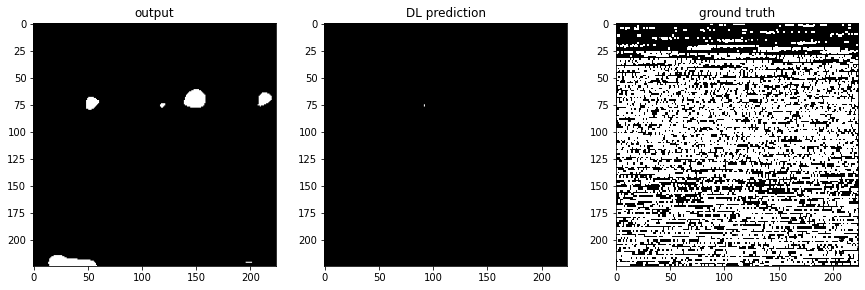

In [ ]:
#pyplot.subplot(1, 3, 1) # have two plots in 1 row two columns, first plot
# assuming im is batch x channel x h x w and channel is RGB
im, mask = next(iter(valid_loader))


im = im.cuda()
mask = mask.cuda()

 


pred = model(im)
plt.figure(figsize=(20,20))

plt.subplot(1,4,1)
#plt.imshow(tf.keras.preprocessing.image.array_to_img(outputs[0,0,:,:]))
plt.imshow(outputs[0,0,:,:].detach().cpu().squeeze(), cmap = 'gray' )
plt.title('output')
plt.subplot(1, 4, 2)
plt.imshow(torch.exp(pred[0].detach().cpu().squeeze()), cmap='gray')
plt.title('DL prediction')
plt.subplot(1, 4, 3)
#plt.imshow(tf.keras.preprocessing.image.array_to_img(mask[0,0,:,:]))
plt.imshow(torch.exp(mask[0].detach().cpu().squeeze()), cmap='gray')
plt.title('ground truth')


#pyplot.plot(im[0].detach().cpu().permute(1, 3, 0))
#pyplot.subplot(1, 3, 2)
#pyplot.plot(mask[0].detach().cpu())
#pyplot.subplot(1, 3, 3) # third plot
#pyplot.plot(pred[0].detach().cpu())